In [1]:
set.seed(2020)
library(readr)
library(lubridate)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")

cat("Players dataset:", nrow(players), "rows,", ncol(players), "columns\n")
cat("Sessions dataset:", nrow(sessions), "rows,", ncol(sessions), "columns\n")

head(players)
head(sessions)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4

Players dataset: 196 rows, 7 columns
Sessions dataset: 1535 rows, 5 columns


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


| Dataset        | Observations | Variables | Description                                                     |
| -------------- | ------------ | --------- | --------------------------------------------------------------- |
| `players.csv`  | 196          | 7         | Contains demographic and experience information for each player |
| `sessions.csv` | 1535         | 5         | Contains detailed time records of each player’s gaming sessions |

| Variable       | Type      | Description                                                                  |
| -------------- | --------- | ---------------------------------------------------------------------------- |
| `experience`   | Character | The player’s experience level (e.g., *Amateur*, *Regular*, *Pro*, *Veteran*) |
| `subscribe`    | Logical   | Whether the player has an active subscription (TRUE/FALSE)                   |
| `hashedEmail`  | Character | Anonymized unique identifier for each player, used to link across datasets   |
| `played_hours` | Numeric   | Total hours the player has played so far                                     |
| `name`         | Character | Player’s in-game name                                                        |
| `gender`       | Character | Player’s gender (*Male* or *Female*)                                         |
| `Age`          | Integer   | Player’s age (in years)                                                      |

| Variable              | Type      | Description                                                     |
| --------------------- | --------- | --------------------------------------------------------------- |
| `hashedEmail`         | Character | Both data has that as a unique identifier   |
| `start_time`          | Character | The start time of the game session |
| `end_time`            | Character | The end time of the game session                                |
| `original_start_time` | Numeric   | Unix-style timestamp representing the start of the session      |
| `original_end_time`   | Numeric   | Unix-style timestamp representing the end of the session        |

**Introduction** \
This project investigates the question: how will we use factors like age and whether the player subscribes to a gaming newsletter to predict the hours played by a player. And to determine the type of player that would contribute a lot of data. To answer this, we will use data analysis and a K-Nearest Neighbors (KNN) regression model to examine the relationship between player's traits and total recorded playtime.

In [2]:
players<-read_csv("https://raw.githubusercontent.com/danayong25-cell/Group-Final-Project/refs/heads/main/players.csv")

sessions<-read_csv("https://raw.githubusercontent.com/danayong25-cell/Group-Final-Project/refs/heads/main/sessions.csv")|>
    separate(start_time,into=c("start_date","start_time"),sep=" ")|>
    separate(end_time,into=c("end_date","end_time"),sep=" ")|>
        mutate(
            start_dt = as.POSIXct(paste(start_date,start_time),format="%d/%m/%Y %H:%M"),
            end_dt = as.POSIXct(paste(end_date,end_time),format="%d/%m/%Y %H:%M"),
            duration_hours= as.numeric(difftime(end_dt,start_dt,units="hours"))
        )
head(sessions)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time,start_dt,end_dt,duration_hours
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12,2024-06-30 18:12:00,2024-06-30 18:24:00,0.2000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12,2024-06-17 23:33:00,2024-06-17 23:46:00,0.2166667
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12,2024-07-25 17:34:00,2024-07-25 17:57:00,0.3833333
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12,2024-07-25 03:22:00,2024-07-25 03:58:00,0.6000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12,2024-05-25 16:01:00,2024-05-25 16:12:00,0.1833333
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12,2024-06-23 15:08:00,2024-06-23 17:10:00,2.0333333


In [3]:
player_sessions<-sessions|>
    group_by(hashedEmail) |>
    summarise(
    total_hours = sum(duration_hours, na.rm = TRUE),
    session_count = n()
    )
player_sessions|>
    summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

total_hours,session_count
<dbl>,<dbl>
10.4,12.28


In [4]:
full_data<-players|>
    left_join(player_sessions,by="hashedEmail")
head(full_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_hours,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,33.65000000,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,4.25000000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0.08333333,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,0.83333333,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,0.15000000,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


In [5]:
summary(sessions$duration_hours)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0500  0.1500  0.5000  0.8476  1.2167  4.3167       2 

In [6]:
players|>
    summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

played_hours,Age
<dbl>,<dbl>
5.85,21.14


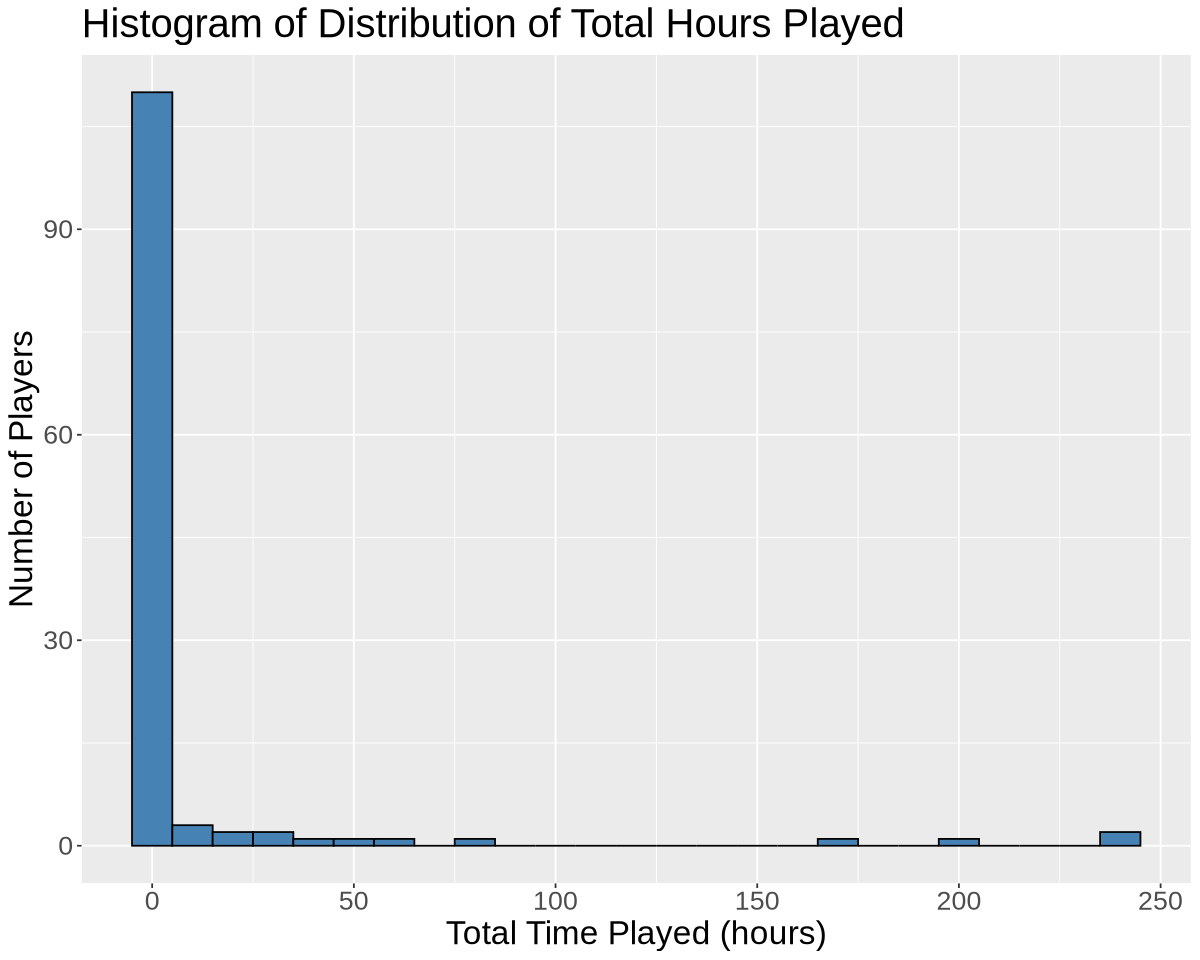

In [7]:
options(repr.plot.width=10,repr.plot.height=8)
total_hours_histogram<-ggplot(full_data |> filter(!is.na(total_hours)), aes(x = total_hours)) +
    geom_histogram(binwidth = 10, fill = "steelblue", color = "black") +
    labs(title = "Histogram of Distribution of Total Hours Played",
         x = "Total Time Played (hours)",
         y = "Number of Players")+
    theme(text=element_text(size=20))
total_hours_histogram

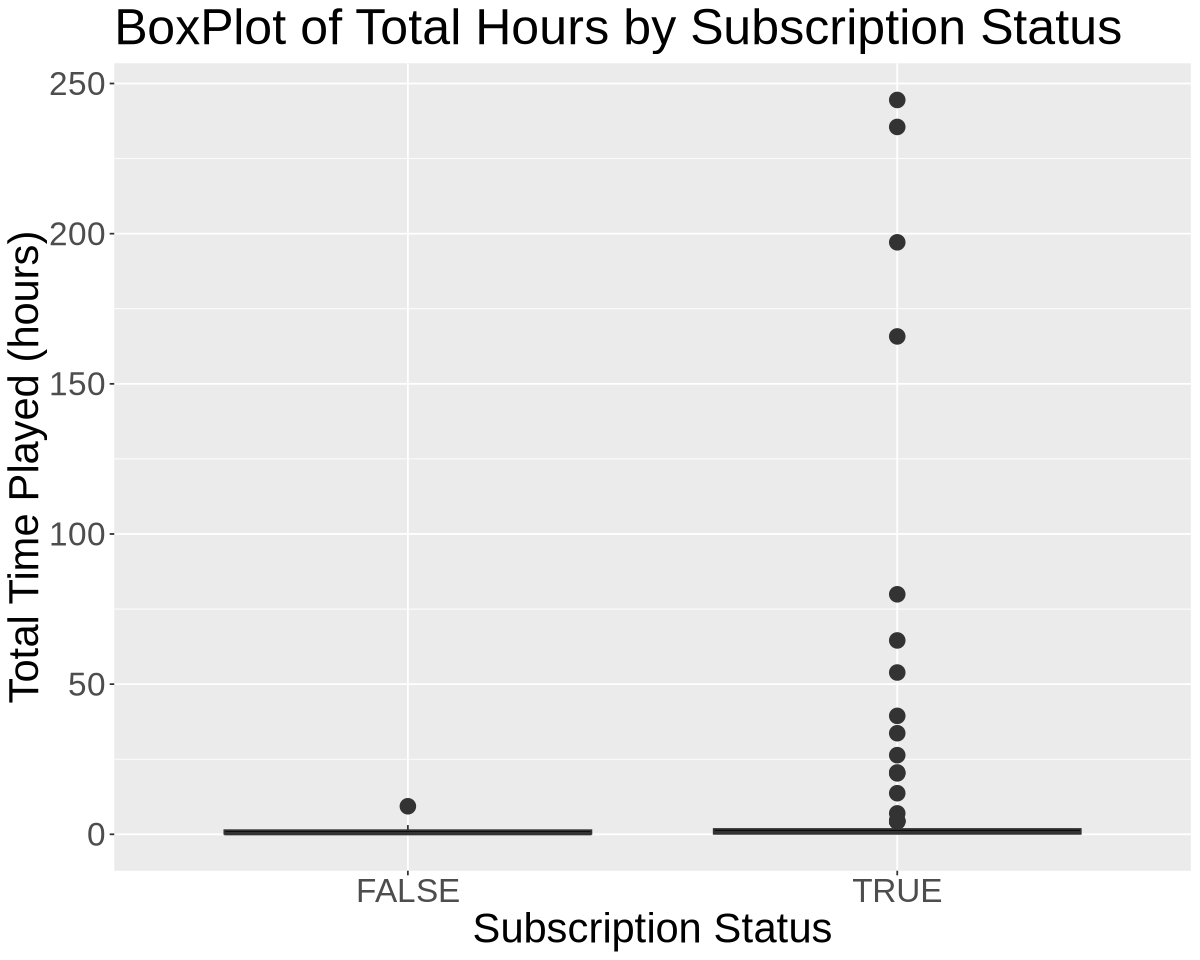

In [8]:
options(repr.plot.width=10,repr.plot.height=8)
total_hours_boxplot <- ggplot(full_data |> filter(!is.na(total_hours)), aes(x = subscribe, y = total_hours)) +
    geom_boxplot(fill = "black", outlier.size=4) +
    labs(title = "BoxPlot of Total Hours by Subscription Status",
         x = "Subscription Status",
         y = "Total Time Played (hours)")+
    theme(text=element_text(size=25))
total_hours_boxplot

There is a empty section between 100-150 in total time played with those who are subscribed, which may mean that those that game for the longest tend to be subscribed. There are also more people subscribed than not that contribute hours played, which makes it seem like there are very few people who play minecraft that aren't subscribed. 

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


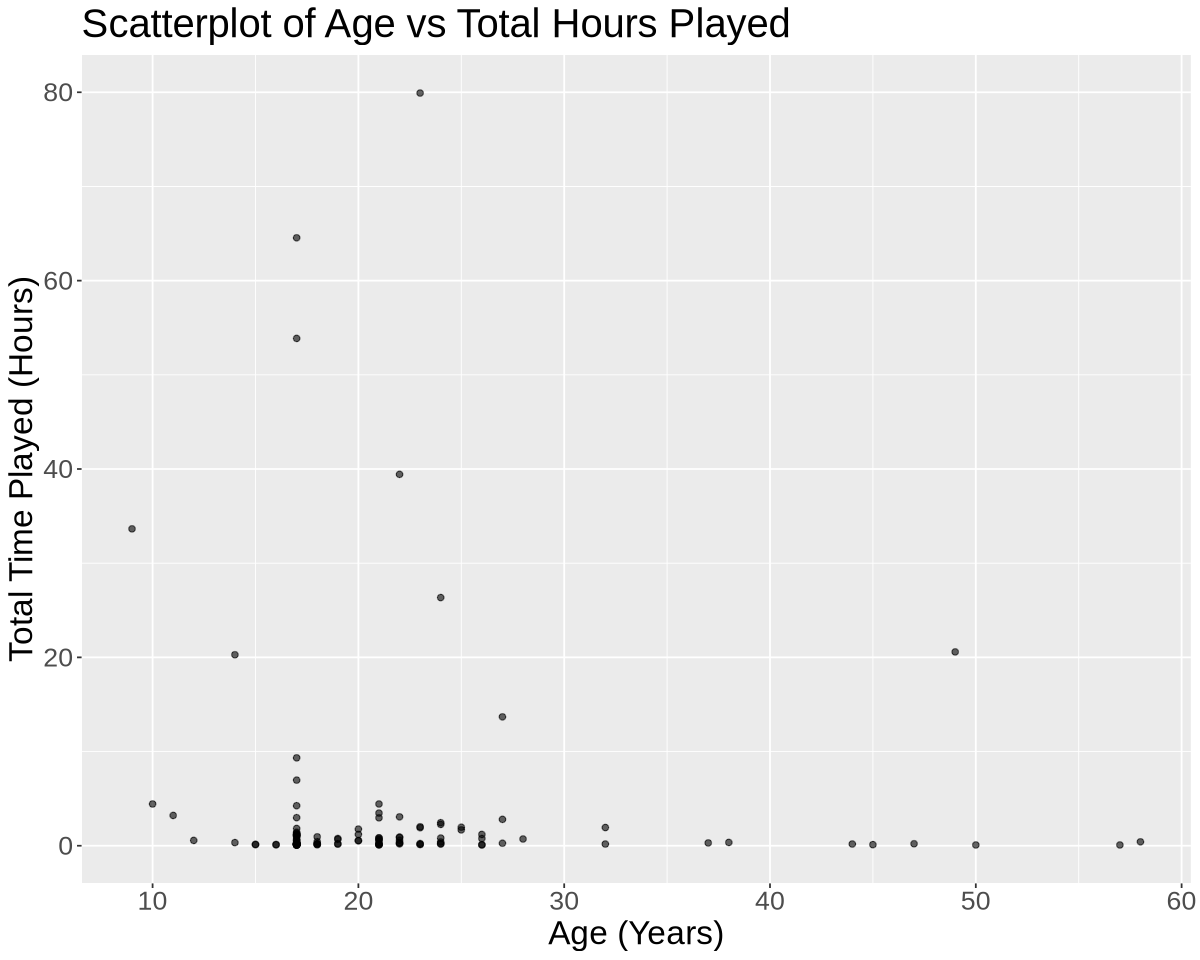

In [9]:
options(repr.plot.width=10,repr.plot.height=8)
total_hours_scatterplot<-ggplot(full_data |> filter(!is.na(total_hours)), aes(x = Age, y = total_hours)) +
  geom_point(alpha = 0.6, color = "black") +
  labs(title = "Scatterplot of Age vs Total Hours Played",
       x = "Age (Years)",
       y = "Total Time Played (Hours)")+
    ylim(c(0,80))+
    theme(text=element_text(size=20))
total_hours_scatterplot

In [10]:
full_data$subscribe <- factor(full_data$subscribe,
                              levels = c(FALSE, TRUE),
                              labels = c("Not Subscribed", "Subscribed"))

split <- initial_split(full_data, prop = 0.75, strata = total_hours)
data_training <- training(split)
data_testing <- testing(split)

knn_spec<- nearest_neighbor(weight_func="rectangular",neighbors = tune()) |>
    set_engine("kknn")|>
    set_mode("regression")

knn_recipe <- recipe(total_hours ~ Age + subscribe, data = data_training) |>
    step_impute_mean(all_numeric_predictors())|>
    step_unknown(all_nominal_predictors(),new_level="missing")|>
    step_dummy(all_nominal_predictors())|>
    step_zv(all_predictors())|>
    step_normalize(all_numeric_predictors())

knn_workflow<-workflow()|>
    add_recipe(knn_recipe)|>
    add_model(knn_spec)
knn_workflow

data5fold <- vfold_cv(data_training, v=5)
kvals <- tibble(neighbors = 1:20)

knn_tuned<-tune_grid(knn_workflow,
                     resamples=data5fold,
                     grid=kvals,
                     metrics=metric_set(rmse))
collect_metrics(knn_tuned)

best_k <- select_best(knn_tuned, metric = "rmse")
best_k

final_knn <- finalize_workflow(knn_workflow, best_k)

final_fit <- final_knn |>
    fit(data = data_training)

preds<-predict(final_fit, new_data=data_testing) |>
    bind_cols(data_testing)

metrics<-preds|>
    metrics(truth = total_hours, estimate = .pred)
metrics


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_impute_mean()
• step_unknown()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,36.91050,5,6.370712,Preprocessor1_Model01
2,rmse,standard,33.79134,5,6.297198,Preprocessor1_Model02
3,rmse,standard,31.65188,5,7.210372,Preprocessor1_Model03
4,rmse,standard,30.47032,5,7.733400,Preprocessor1_Model04
5,rmse,standard,29.76955,5,8.044418,Preprocessor1_Model05
6,rmse,standard,29.37071,5,8.262323,Preprocessor1_Model06
7,rmse,standard,29.06991,5,8.413093,Preprocessor1_Model07
8,rmse,standard,28.70480,5,8.510878,Preprocessor1_Model08
9,rmse,standard,28.60846,5,8.577514,Preprocessor1_Model09


neighbors,.config
<int>,<chr>
13,Preprocessor1_Model13


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,51.90140152
rsq,standard,0.05603974
mae,standard,17.97272325


Our mean is higher because we have some outliers in our data. 

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”



Not Subscribed     Subscribed 
            52            144 

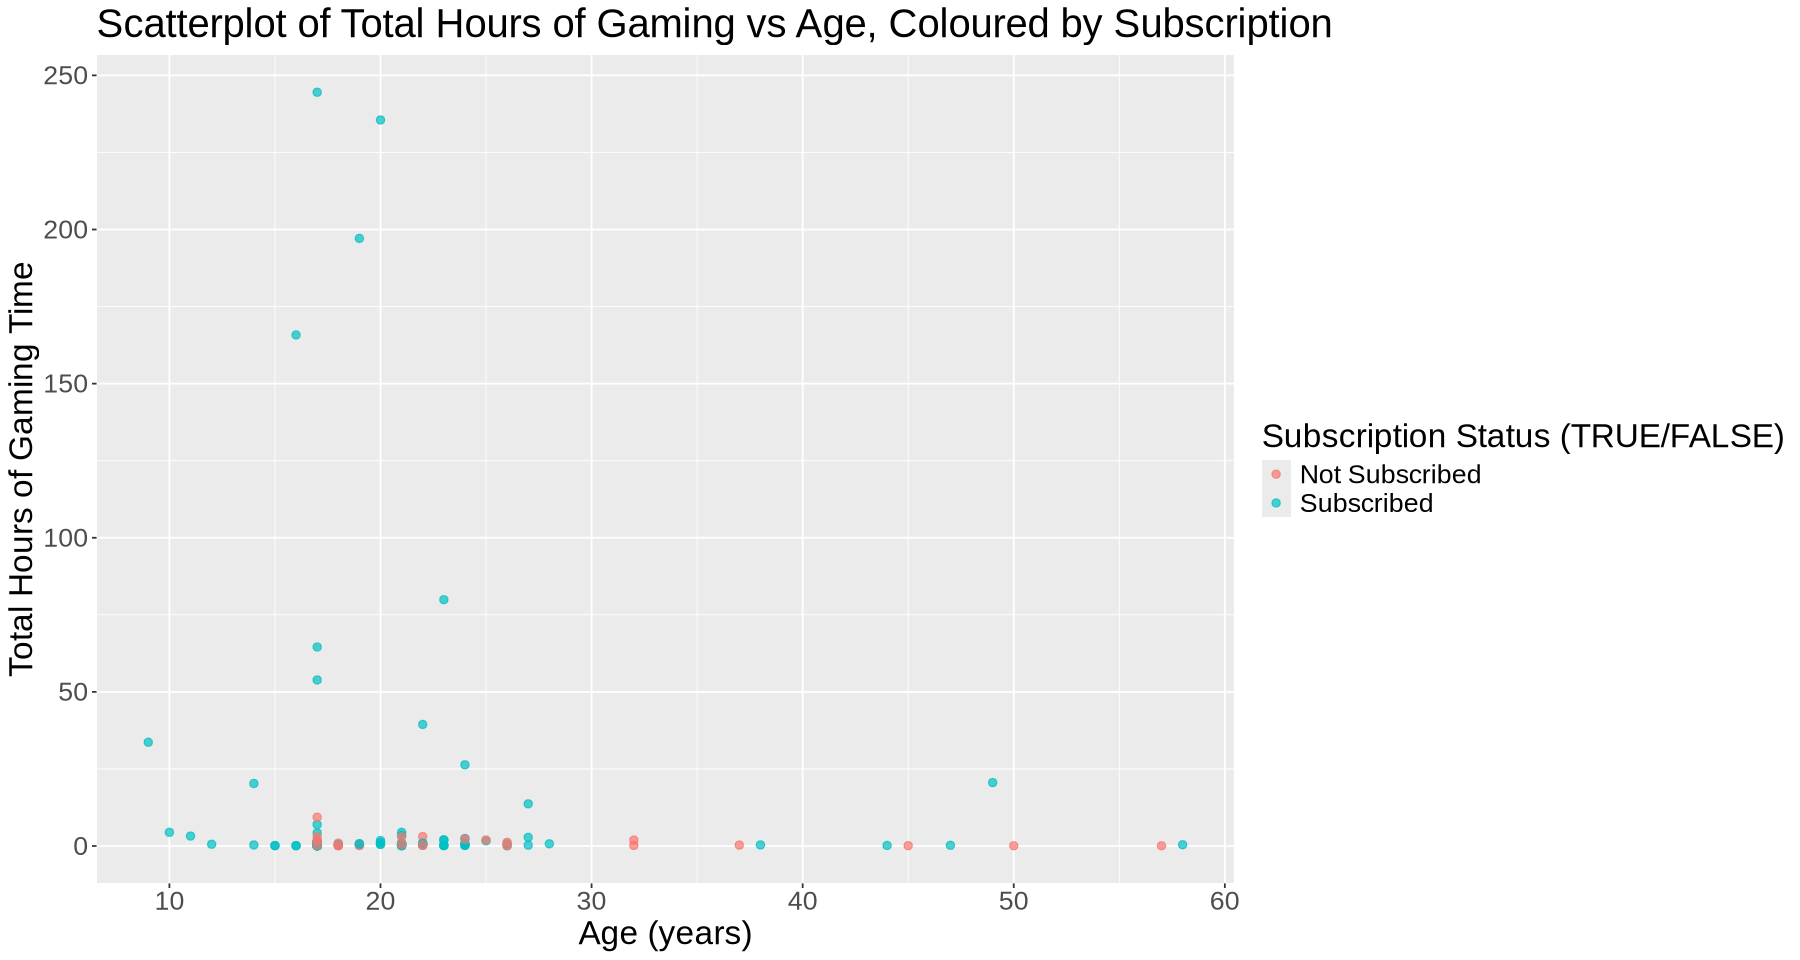

In [11]:
options(repr.plot.width=15,repr.plot.height=8)
scaled_scatterplot<-ggplot(full_data,aes(x = Age,y = total_hours, color = subscribe))+
    geom_point(alpha=0.7, size=2)+
    labs(x="Age (years)",
         y="Total Hours of Gaming Time",
         title="Scatterplot of Total Hours of Gaming vs Age, Coloured by Subscription",
         color="Subscription Status (TRUE/FALSE)")+
    theme(text=element_text(size=20))
scaled_scatterplot

table(full_data$subscribe)

Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”



Not Subscribed     Subscribed 
            13             37 

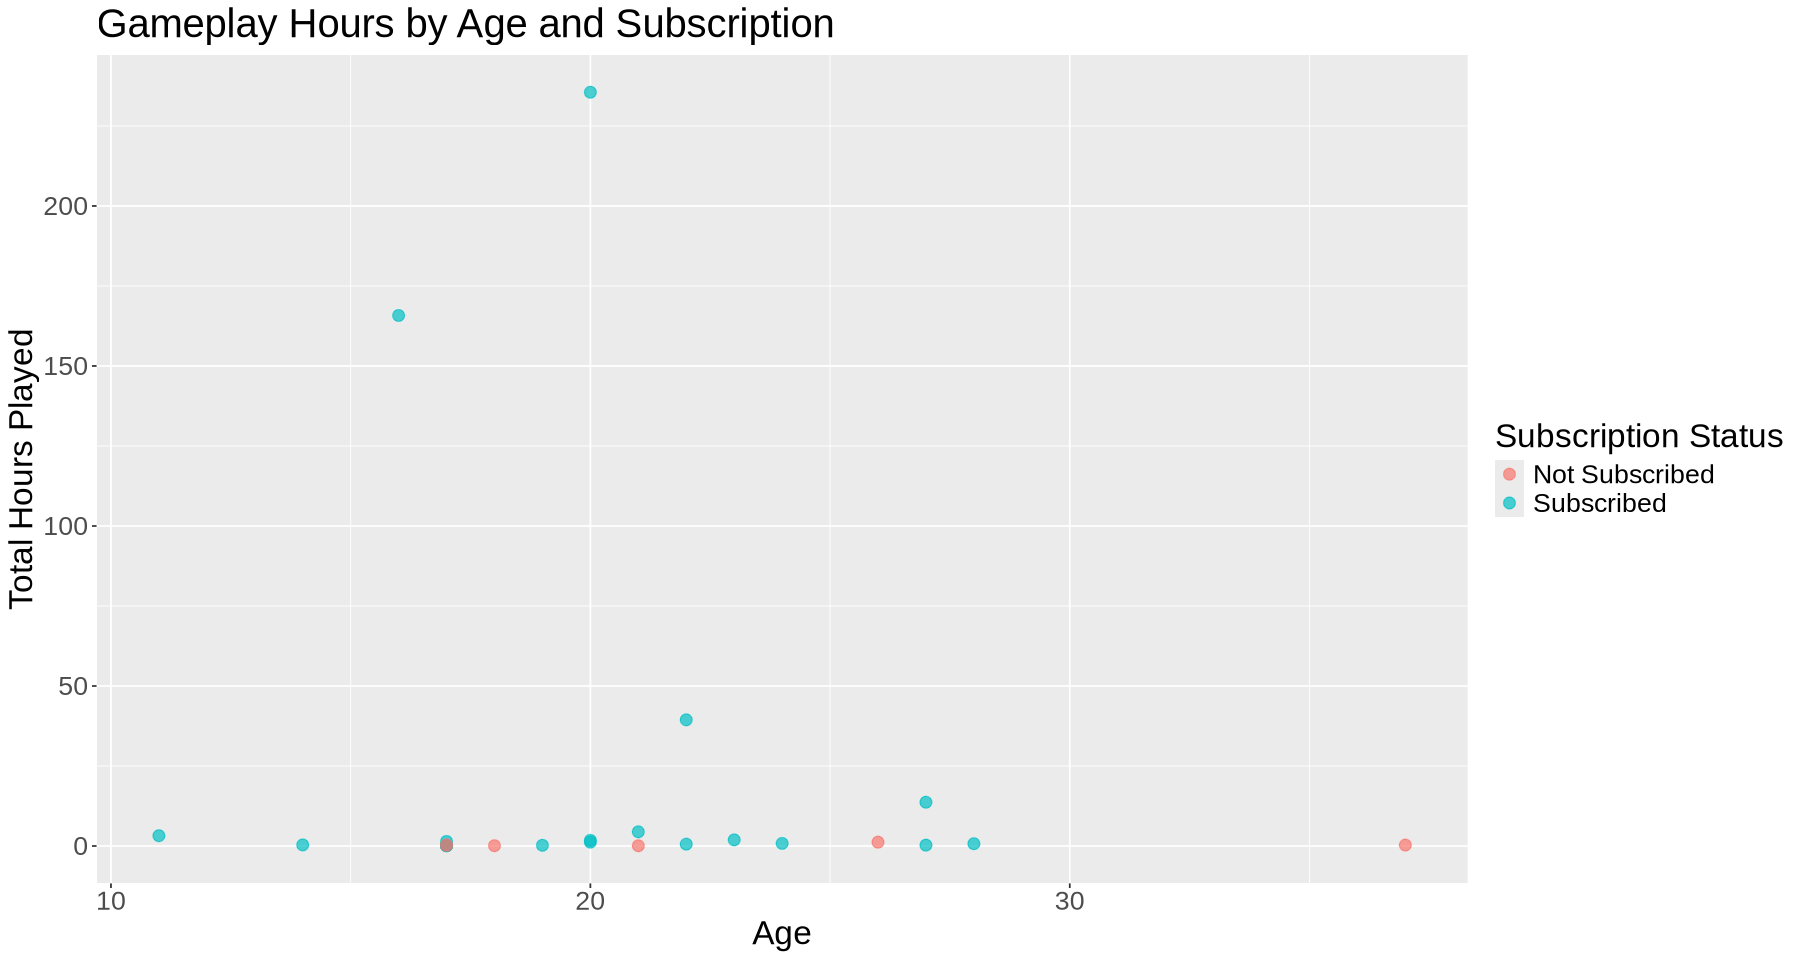

In [12]:
options(repr.plot.width=15,repr.plot.height=8)
scatterplot_preds<-ggplot(preds, aes(x = Age, y = total_hours, color = subscribe)) +
    geom_point(alpha = 0.7, size = 3) +
    labs(x = "Age",
         y = "Total Hours Played",
         color = "Subscription Status",
         title = "Gameplay Hours by Age and Subscription") +
    theme(text=element_text(size=20))
scatterplot_preds

table(preds$subscribe)

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”


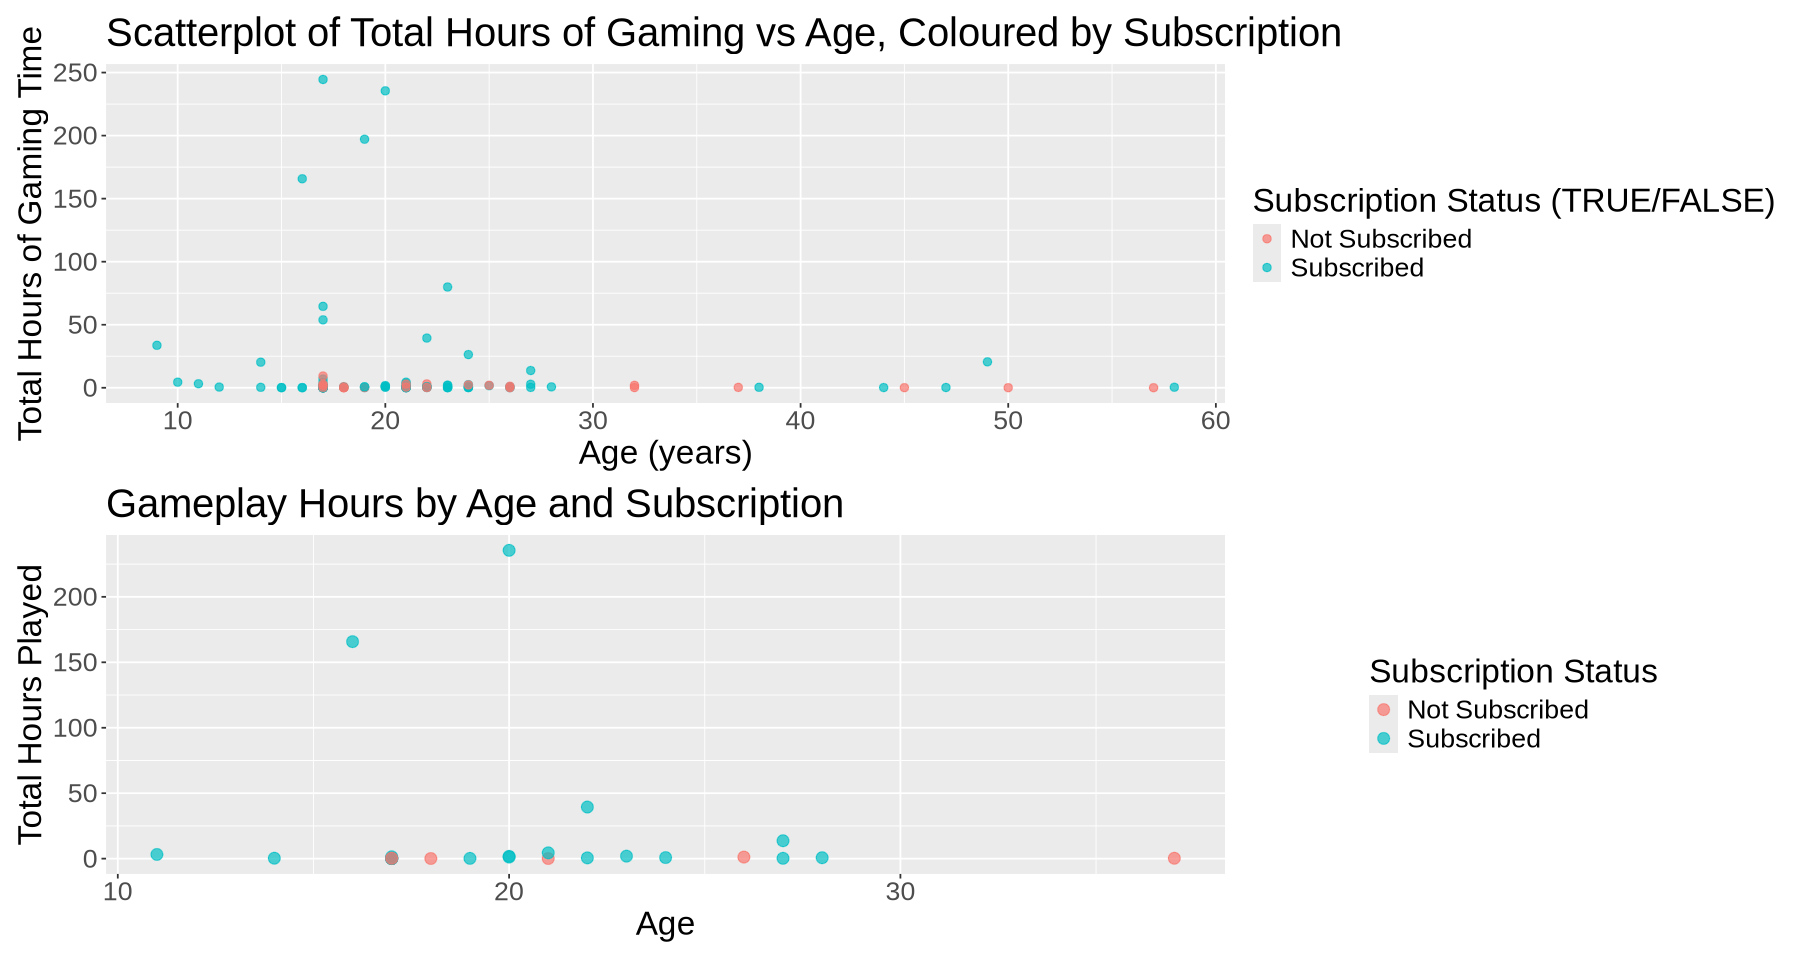

In [14]:
library(patchwork)
scaled_scatterplot/scatterplot_preds

The predicted subscribed vs not subscribed as well as the ratio is quite similar to the data provided, the only main difference is fewer data points, as well as fewer data points that played for longer hours. The predicted visualization does provide some information and the overall trend that those who play more are subscribed, but it does not capture the clustering around ages 15-25 as clearly as the previous graph, or enough data points to see a clear trend between the variables. 

**Description of the Analysis**: \
In this analysis, we try to understand which kinds of players contribute the most gameplay time, and how factors such as **age** and **newsletter subscription status** can be used to **predict total hours played**. To accomplish this, we cleaned and merged gameplay session data, explored patterns through visualizations, and then built a **K-Nearest Neighbors (KNN) regression model** using the tidymodels framework. 

**1. Data Load and Preprocess** \
We firstly importe two datasets: 
- players.csv – demographic and subscription information for each player 
- sessions.csv – logs of individual gameplay sessions with start and end timestamps

The session data required cleaning before analysis. So we split the combined timestamps into separate date and time fields: 
-  Reconstructed these into proper date variables (start_dt, end_dt). 
- Computed the length of each session as duration_hours = end_dt – start_dt.

We then aggregated sessions per player to calculate: 

- total_hours_played
- session_count

These summaries were merged back into the player dataset to create full_data, containing demographic information and total hours played for each individual. 

**2. Exploratory Data Analysis** \
To better understand patterns, we created several visualizations: 
- Histogram of total hours played to examine the overall distribution of gameplay time. 
- Boxplot of total time played(hours) by subscription status to see if newsletter subscribers play more or less. 
- Scatterplot of age vs. total hours to explore how age relates to gameplay time. 

These plots provided initial intuition on potential predictors of player engagement. 

**3. Preparing the Data for Modeling**
Before fitting the KNN model, we split the data into:
- 75% training data 
- 25% testing data

We then constructed a recipe to preprocess predictors: \
1.	step_unknown() – handles missing categorical values. \
2.	step_dummy() – converts subscription status into dummy variables. \
3.	step_zv() – removes predictors with zero variance. \
4.	step_normalize() – scales numeric predictors (required for distance-based models like KNN). \
This recipe ensures that all predictors are cleaned and formatted properly.

**4. Build and Tune the KNN Regression Model**
To determine the best number of k :
- We created a grid of k values from 1 to 20.
- Applied 5-fold cross-validation on the training set.
- Tuned the model using tune_grid() and evaluated performance using rmse.
From these results, we selected the best-performing value of k using:
select_best(knn_tuned, metric = "rmse")
The workflow was then finalized with this optimal k. 

**5. Final Model Fit and Evaluation** \
The finalized KNN model was fit on the full training set, and predictions were made on the testing data. \
We evaluated the model's performance by computing:
- Root Mean Squared Error (rmse)
- Other metrics to compare predicted & actual total hours played.
This allowed us to quantify how well age and subscription status can explain variation in gameplay time.

**6. Colored Scatterplot**
To further explore the relationship between player demographics and gameplay behavior, we created a colored scatterplot showing how total hours played varies with age, while also incorporating newsletter subscription status. In this visualization: 
- Age is plotted on the x-axis. 
- Total hours played is plotted on the y-axis. 
- Points are color-coded by subscription status (“true” or “false”). 

This allows us to visually inspect whether subscribers tend to cluster at higher or lower gameplay levels compared to non-subscribers, and whether age interacts with subscription status in explaining total gameplay.

This helps confirm whether the groups are balanced or imbalanced, which is important for both interpretation and modeling.

**Summary** \
1.	Cleaned and merged gameplay session data \
2.	Summarized total hours per player \
3.	Explored patterns through visualizations \
4.	Prepared variables using a tidymodels recipe \
5.	Built and tuned a KNN regression model using cross-validation \
6.	Selected the best model and evaluated it on test data \
7. Colour the cluster for more better visualization